In [1]:
## My First Try


In [2]:
from pandas import DataFrame, read_csv
import pandas as pd #this is how I usually import pandas
import matplotlib.pyplot as plt #for plot
import nltk
#read_csv?
Location = r'../twitter_data/train2017.tsv'
df = pd.read_csv(Location,delimiter = '\t',nrows=100,names=['id','id2','tag','text'])
df.text

0     Gas by my house hit $3.39!!!! I'm going to Cha...
1     Theo Walcott is still shit, watch Rafa and Joh...
2     its not that I'm a GSP fan, i just hate Nick D...
3     Iranian general says Israel's Iron Dome can't ...
4     Tehran, Mon Amour: Obama Tried to Establish Ti...
5     I sat through this whole movie just for Harry ...
6     with J Davlar 11th. Main rivals are team Polan...
7     Talking about ACT's && SAT's, deciding where I...
8     Why is \""Happy Valentines Day\"" trending? It...
9     They may have a SuperBowl in Dallas, but Dalla...
10    Im bringing the monster load of candy tomorrow...
11    Apple software, retail chiefs out in overhaul:...
12    @oluoch @victor_otti @kunjand I just watched i...
13    One of my best 8th graders Kory was excited af...
14    #Livewire Nadal confirmed for Mexican Open in ...
15    @MsSheLahY I didnt want to just pop up... but ...
16    @Alyoup005 @addicted2haley hmmmm  November is ...
17    #Iran US delisting MKO from global terrori

In [3]:
#df['id'].plot()

from nltk import word_tokenize

list_token = []
#i = 0
for line in df.text:
#    print(line)
    token = word_tokenize(line)
    list_token.append(token)
#    print(token)
#     i = i+1

print(list_token)


[['Gas', 'by', 'my', 'house', 'hit', '$', '3.39', '!', '!', '!', '!', 'I', "'m", 'going', 'to', 'Chapel', 'Hill', 'on', 'Sat', '.', ':', ')'], ['Theo', 'Walcott', 'is', 'still', 'shit', ',', 'watch', 'Rafa', 'and', 'Johnny', 'deal', 'with', 'him', 'on', 'Saturday', '.'], ['its', 'not', 'that', 'I', "'m", 'a', 'GSP', 'fan', ',', 'i', 'just', 'hate', 'Nick', 'Diaz', '.', 'ca', "n't", 'wait', 'for', 'february', '.'], ['Iranian', 'general', 'says', 'Israel', "'s", 'Iron', 'Dome', 'ca', "n't", 'deal', 'with', 'their', 'missiles', '(', 'keep', 'talking', 'like', 'that', 'and', 'we', 'may', 'end', 'up', 'finding', 'out', ')'], ['Tehran', ',', 'Mon', 'Amour', ':', 'Obama', 'Tried', 'to', 'Establish', 'Ties', 'with', 'the', 'Mullahs', 'http', ':', '//t.co/TZZzrrKa', 'via', '@', 'PJMedia_com', 'No', 'Barack', 'Obama', '-', 'Vote', 'Mitt', 'Romney'], ['I', 'sat', 'through', 'this', 'whole', 'movie', 'just', 'for', 'Harry', 'and', 'Ron', 'at', 'christmas', '.', 'ohlawd'], ['with', 'J', 'Davlar', '

In [4]:
'''
Stemming
'''

from nltk.stem import StemmerI, RegexpStemmer, LancasterStemmer, ISRIStemmer, PorterStemmer, SnowballStemmer, RSLPStemmer

#stemmer = WordNetLemmatizer()
#stemmer = LancasterStemmer()
#stemmer = SnowballStemmer('english')
# #stemmer = PorterStemmer()
# from nltk.stem import  WordNetLemmatizer
# stemmer = WordNetLemmatizer()
# stems = [  stemmer.stem(token) for token in list_token[0] ]
# print(stems)

In [5]:
from nltk.corpus import wordnet
# Lemmatize with POS Tag
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

from nltk.stem import  WordNetLemmatizer

# 1. Init Lemmatizer
lemmatizer = WordNetLemmatizer()


# 3. Lemmatize a Sentence with the appropriate POS tag
list_tweets = []
sentence = "The striped bats are hanging on their feet for best"
for line in df.text:
    list_tweets.append([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(line)])
print(list_tweets)

[['Gas', 'by', 'my', 'house', 'hit', '$', '3.39', '!', '!', '!', '!', 'I', "'m", 'go', 'to', 'Chapel', 'Hill', 'on', 'Sat', '.', ':', ')'], ['Theo', 'Walcott', 'be', 'still', 'shit', ',', 'watch', 'Rafa', 'and', 'Johnny', 'deal', 'with', 'him', 'on', 'Saturday', '.'], ['it', 'not', 'that', 'I', "'m", 'a', 'GSP', 'fan', ',', 'i', 'just', 'hate', 'Nick', 'Diaz', '.', 'ca', "n't", 'wait', 'for', 'february', '.'], ['Iranian', 'general', 'say', 'Israel', "'s", 'Iron', 'Dome', 'ca', "n't", 'deal', 'with', 'their', 'missile', '(', 'keep', 'talk', 'like', 'that', 'and', 'we', 'may', 'end', 'up', 'find', 'out', ')'], ['Tehran', ',', 'Mon', 'Amour', ':', 'Obama', 'Tried', 'to', 'Establish', 'Ties', 'with', 'the', 'Mullahs', 'http', ':', '//t.co/TZZzrrKa', 'via', '@', 'PJMedia_com', 'No', 'Barack', 'Obama', '-', 'Vote', 'Mitt', 'Romney'], ['I', 'sat', 'through', 'this', 'whole', 'movie', 'just', 'for', 'Harry', 'and', 'Ron', 'at', 'christmas', '.', 'ohlawd'], ['with', 'J', 'Davlar', '11th', '.', 

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=100, stop_words='english') 
bow_xtrain = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False).fit_transform(list_tweets)  #TWEETS : a list with the actual tweets 
print(bow_xtrain.toarray())


[[4 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [2 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [7]:
# try:

import gensim
# except NameError:
#     print('gensim is not installed')
    
# from gensim.test.utils import common_texts, get_tmpfile
# from gensim.models import Word2Vec

model_w2v = gensim.models.Word2Vec(
            list_tweets,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 

model_w2v.train(list_tweets, total_examples= len(list_tweets), epochs=20)



C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


(18324, 48320)

In [8]:
import sklearn
from sklearn.manifold import TSNE


def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []

    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
               textcoords='offset points',
                         ha='right',
                         va='bottom')
    plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


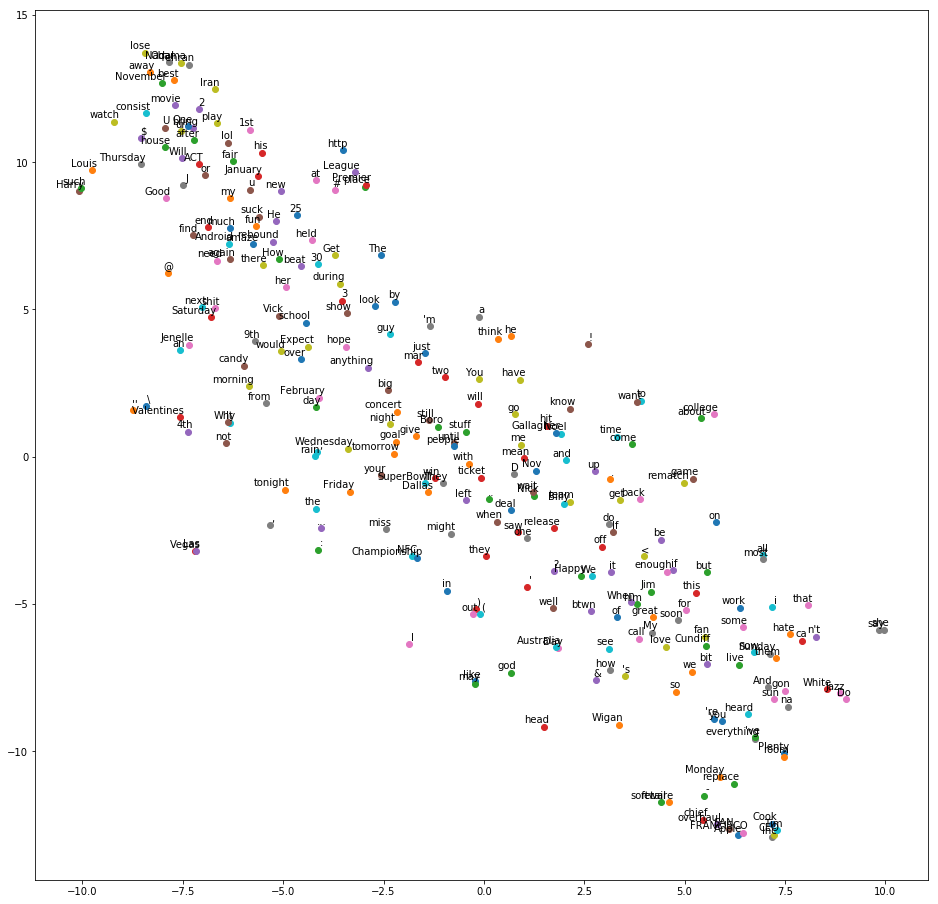

In [10]:
tsne_plot(model_w2v)

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


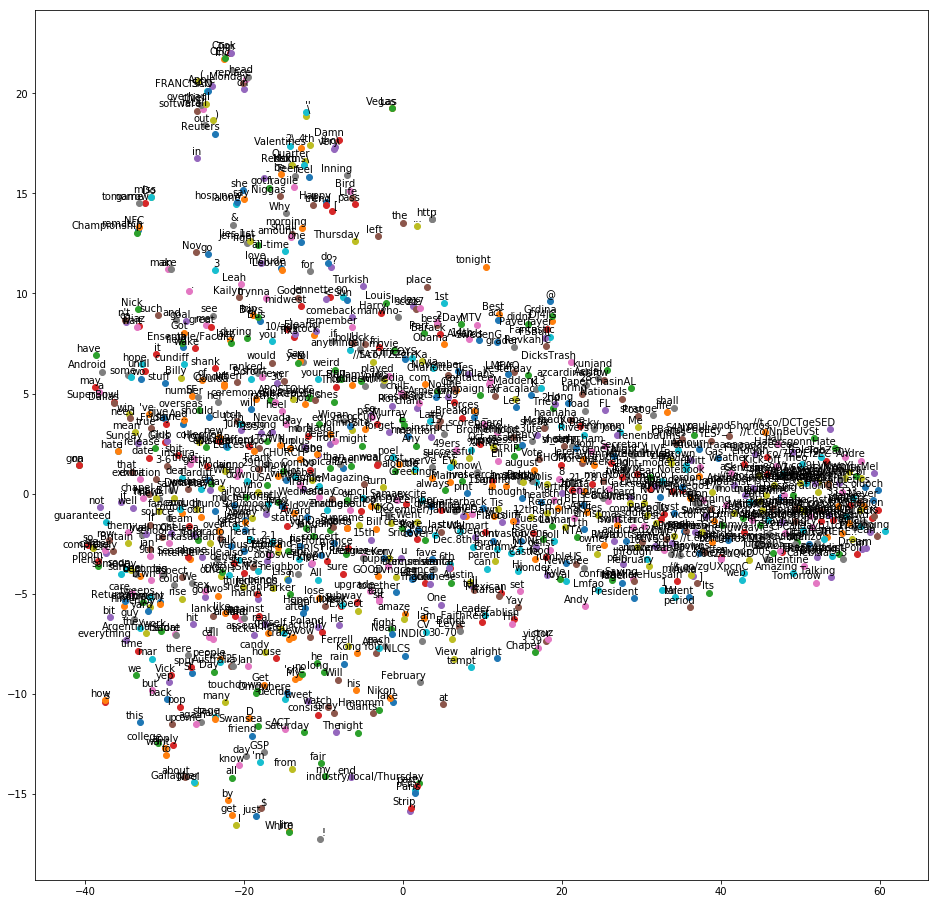

In [14]:
dirty_list = df.text.tolist()
#print(dirty_list)
dirty_model = gensim.models.Word2Vec(
            list_tweets,
            size=50, # desired no. of features/independent variables
            window=5, # context window size
            min_count=1,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 

dirty_model.train(list_tweets, total_examples= len(list_tweets), epochs=20)
tsne_plot(dirty_model)

In [15]:
dirty_model['food']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.11252864,  0.0137839 , -0.10594317, -0.11660523,  0.32152253,
        0.11082701, -0.10402697,  0.17209643,  0.1554754 ,  0.22576293,
        0.39416668, -0.27501643,  0.11427537,  0.24715322,  0.24377759,
        0.19141904, -0.13177444,  0.16106501, -0.07189073, -0.12655534,
        0.3346281 ,  0.16040312, -0.1352228 , -0.19213025, -0.10026392,
        0.1547822 ,  0.32687542, -0.1708892 ,  0.16138414, -0.12872681,
        0.29803506,  0.01348713,  0.26852182, -0.37976256, -0.19531973,
        0.0060245 ,  0.13578866,  0.2514925 ,  0.29898393,  0.26949048,
        0.00302061,  0.19923861, -0.29350346,  0.20890081, -0.27640527,
       -0.09327503, -0.27720407,  0.3813691 , -0.09824985, -0.23865297],
      dtype=float32)